In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../' # Expected to be in rank_scripts/

import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net(caffe_root +  'rank_scripts/multi/deploy_multinet_wa_1.prototxt',
                caffe_root + 'rank_scripts/models103/_iter_10000.caffemodel',
                caffe.TEST)# input preprocessing: 'data'is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [3]:
# set net to batch size
net.blobs['data'].reshape(1,3,227,227)

[-3.55158043 -5.16727257 -8.96870041 ..., -3.77280712 -6.94413567
 -5.06168747]


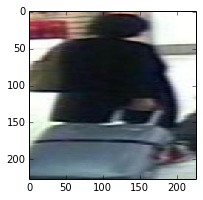

In [9]:
#query_image_path = '/home/jayant/caffe-Person-ReID_triplet/rank_scripts/images_market/0004_c1s6_016996_00.jpg'
query_image_path = '/home/jayant/vision/PETA/i-LID_alex/archive/0001_001.jpg'
query_image = caffe.io.load_image(query_image_path)
net.blobs['data'].data[...] = transformer.preprocess('data', query_image)
out = net.forward()
vector_query = out['fc7'][0]
plt.figure(figsize=(3,3))
plt.imshow(query_image)
print vector_query

In [10]:
print net.blobs['data'].data[...][0][2][222][127]

102.0


In [11]:
print net.blobs['fc6'].data[...][0]

[-0. -0. -0. ..., -0. -0. -0.]


In [14]:
#for item in net.blobs['fc6'].data[...][0]:
    #print item,

In [8]:
print query_image[222][127][0]*255

179.00000453


In [25]:
#print net.blobs['conv3'].data[...][0]

In [12]:
#rint net.blobs['conv3'].data[...][0]

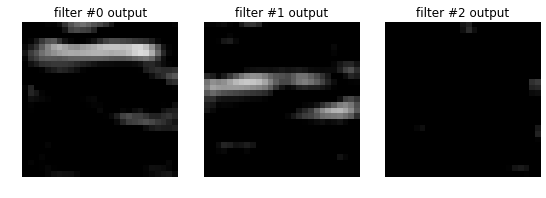

In [9]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv2'].data.min(), net.blobs['conv2'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv2'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

In [16]:
#print out['fc8_a'][0]